## Running the Stochastic SEIR2 DENV model 
The models (deterministic and stochastic) for these results are situated in DENV_models_pySODM.py  
These models range from deterministic SEIRH with exaclty the same value per age group to stochastic SEIR2 models with differring beta values per age group and seasonal variation in the beta parameter. 

In [ ]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
################
## Load model ##
################

from DENV_models_pySODM import JumpProcess_SEIR2_model as DENV_model
print(DENV_model)
print(DENV_model.states)
print(DENV_model.parameters)

<class 'DENV_models_pySODM.JumpProcess_SEIR2_model'>
['S', 'E1', 'E2', 'I1', 'I2', 'R1', 'R2', 'H1', 'H2', 'R12']
['beta', 'sigma', 'gamma', 'psi']


In [3]:
## checking where the error in model = DENV_model() is comming from: 

# The following lines of code are coming from base.py

#self.states_names = self.states
#self.parameters_names = self.parameters
#self.parameters_stratified_names = self.stratified_parameters
#self.dimensions_names = self.dimensions 

DENV_model.states_names = DENV_model.states
print("self.states_names", DENV_model.states_names)
DENV_model.parameters_names = DENV_model.parameters ## this is where my error is coming from, the parameter_names is None (empty)
print("self.parameters_names", DENV_model.parameters_names)
DENV_model.parameters_stratified_names = DENV_model.stratified_parameters
print("self.parameters_stratified_names", DENV_model.parameters_stratified_names)

self.states_names ['S', 'E1', 'E2', 'I1', 'I2', 'R1', 'R2', 'H1', 'H2', 'R12']
self.parameters_names ['beta', 'sigma', 'gamma', 'psi']
self.parameters_stratified_names None


In [3]:
#################
## Setup model ##
#################

# Define model parameters
params={'beta': 0.3, 'sigma':5, 'gamma': 15, 'psi': 3}
# Define initial condition
age_groups = pd.IntervalIndex.from_tuples([(0,5),(5,15),(15,65),(65,120)], closed='left')
# Using the hardcode Belgian demographics from the influenza case study
initN = pd.Series(index=age_groups, data=np.array([606938, 1328733, 7352492, 2204478]))  
initERH = pd.Series(index=age_groups, data=np.array([0, 0, 0, 0]))  
initI = (initN * 0.0001).astype('int64')
initS = initN - 2*(initI)

init_states = {'S': list(initS.values),
               'E1': list(initERH.values),
               'E2': list(initERH.values),
               'I1': list(initI.values),
               'I2': list(initI.values),
               'R1': list(initERH.values),
               'R2': list(initERH.values),
               'H1': list(initERH.values),
               'H2': list(initERH.values),
               'R12': list(initERH.values)}

# Define model coordinates
coordinates={'age_group': age_groups}
#coordinates={'age_group': ['0-5','5-15', '15-65','65-120']}

print("initN", initN, "initI", initI, "initERH", initERH)
print("Type init_states", type(init_states), "Type params", type(params)) # both are dictionaries 

initN [0, 5)        606938
[5, 15)      1328733
[15, 65)     7352492
[65, 120)    2204478
dtype: int64 initI [0, 5)        60
[5, 15)      132
[15, 65)     735
[65, 120)    220
dtype: int64 initERH [0, 5)       0
[5, 15)      0
[15, 65)     0
[65, 120)    0
dtype: int64
Type init_states <class 'dict'> Type params <class 'dict'>


In [4]:
####################
# Initialize model #
####################

model = DENV_model(states=init_states, parameters=params, coordinates=coordinates) # no time_dependent_parameters

In [5]:
######################
# simulate the model #
######################
tau = 0.5
n = 1   # Repeated simulations used in visualisations - not used at the moment = 1
out = model.sim(time=500, samples={}, N =n ,tau=tau, output_timestep=1)
#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out)
# print(out.indexes['age_group'].unique())

<xarray.Dataset> Size: 164kB
Dimensions:    (time: 501, age_group: 4)
Coordinates:
  * time       (time) int64 4kB 0 1 2 3 4 5 6 7 ... 494 495 496 497 498 499 500
  * age_group  (age_group) object 32B [0, 5) [5, 15) [15, 65) [65, 120)
Data variables:
    S          (time, age_group) float64 16kB 6.068e+05 1.328e+06 ... 213.0
    E1         (time, age_group) float64 16kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    E2         (time, age_group) float64 16kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    I1         (time, age_group) float64 16kB 60.0 132.0 735.0 ... 0.0 0.0 0.0
    I2         (time, age_group) float64 16kB 60.0 132.0 735.0 ... 0.0 0.0 0.0
    R1         (time, age_group) float64 16kB 0.0 0.0 0.0 ... 1e+05 2.989e+04
    R2         (time, age_group) float64 16kB 0.0 0.0 ... 1.014e+05 3.028e+04
    H1         (time, age_group) float64 16kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    H2         (time, age_group) float64 16kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    R12        (time, age_group) float64 16kB 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


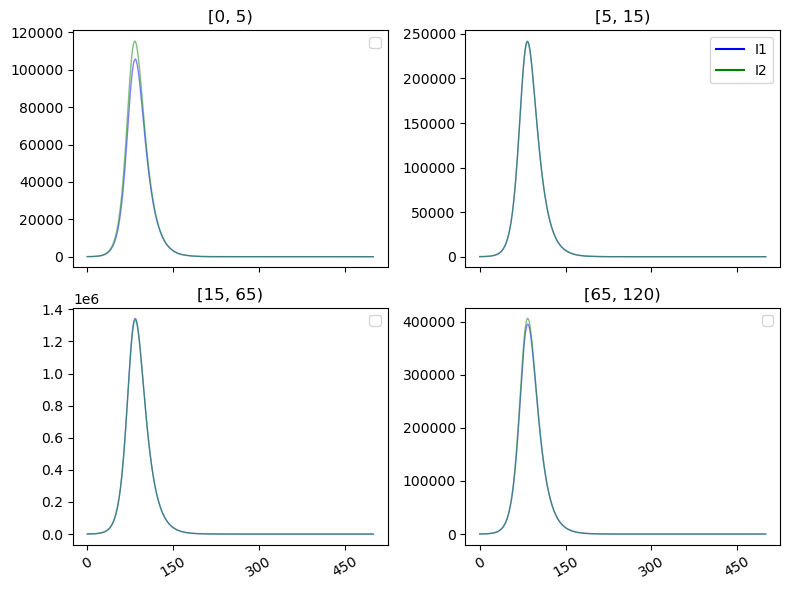

In [6]:
###########################
# Visualizing the results #
###########################
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(8,6)) # we'll make one plot per age-group
axs = axs.reshape(-1) #reshapes the array axs into a one-dimensional array.

unique_age_groups = out.indexes['age_group'].unique()

from matplotlib.lines import Line2D
legend_handles = [
    Line2D([0], [0], color='blue', label='I1'),
    Line2D([0], [0], color='green', label='I2')
]

for id, age_class in enumerate(unique_age_groups):
        # Data
        # empty because I have no data ...
        # Model trajectories
        for i in range(n):
            axs[id].plot(out['time'],out['I1'].sel(age_group=age_class), color='blue', alpha=0.5, linewidth=1)
            axs[id].plot(out['time'],out['I2'].sel(age_group=age_class), color='green', alpha=0.5, linewidth=1)
        # Format
        axs[id].set_title(age_class)
        axs[id].legend()
        axs[id].xaxis.set_major_locator(plt.MaxNLocator(5))
        for tick in axs[id].get_xticklabels():
            tick.set_rotation(30)
        axs[id].grid(False)
        if id==1:
            axs[id].legend(handles=legend_handles, loc = 'upper right')    
        # axs[id].set_yscale('log')

plt.tight_layout()
plt.show()
plt.close()

De resulterende lijnen voor I1 en I2 zijn niet exact gelijk. Hoe kan dit?  
Alle parameter waarden en initiele condities zijn namelijk wel gelijk tussen beide serotypes. Bovendien is dit het resultaat van het deterministisch model. 

## Addition of altering beta depending on the age-group

The previous graph shows the exact same trajectory for each and every age group. This is a bit boring so let's make it more complex step by step. First I will change the beta parameters for each age group. This model is called JumpProcess_SEIR2_BetaPerAge_model in the DENV_models_pySODM.py file

In [7]:
################
## Load model ##
################

from DENV_models_pySODM import JumpProcess_SEIRH_BetaPerAge_model as DENV_model_2

In [8]:
#################
## Setup model ##
#################

# Define model parameters
params={'sigma':5, 'gamma': 15, 'psi': 3, 'beta' : np.array([0.8, 0.7, 0.6, 0.5])} # I made younger groups more infectious than older
# Define initial condition
age_groups = pd.IntervalIndex.from_tuples([(0,5),(5,15),(15,65),(65,120)], closed='left')
# Using the hardcode Belgian demographics from the influenza case study
initN = pd.Series(index=age_groups, data=np.array([606938, 1328733, 7352492, 2204478]))  
initI = (initN * 0.0001).astype('int64')
initS = initN - 2*(initI)

init_states = {'S': list(initS.values),
               'I1': list(initI.values),
               'I2': list(initI.values)}
# Define model coordinates
coordinates={'age_group': age_groups}

In [9]:
####################
# Initialize model #
####################

model2 = DENV_model_2(states=init_states, parameters=params, coordinates=coordinates) # no time_dependent_parameters

In [10]:
##########################
# simulate the new model #
##########################
tau = 0.5
n = 1   # Repeated simulations used in visualisations - not used at the moment = 1
out2 = model2.sim(time=250, samples={}, N =n ,tau=tau, output_timestep=1)
#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out2)
# print(out.indexes['age_group'].unique())

<xarray.Dataset> Size: 82kB
Dimensions:    (time: 251, age_group: 4)
Coordinates:
  * time       (time) int64 2kB 0 1 2 3 4 5 6 7 ... 244 245 246 247 248 249 250
  * age_group  (age_group) object 32B [0, 5) [5, 15) [15, 65) [65, 120)
Data variables:
    S          (time, age_group) float64 8kB 6.068e+05 1.328e+06 ... 0.0 0.0
    E1         (time, age_group) float64 8kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    E2         (time, age_group) float64 8kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    I1         (time, age_group) float64 8kB 60.0 132.0 735.0 ... 1.0 4.0 3.0
    I2         (time, age_group) float64 8kB 60.0 132.0 735.0 ... 2.0 10.0 1.0
    R1         (time, age_group) float64 8kB 0.0 0.0 0.0 ... 4.152e+04 1.546e+04
    R2         (time, age_group) float64 8kB 0.0 0.0 0.0 ... 4.143e+04 1.557e+04
    H1         (time, age_group) float64 8kB 0.0 0.0 0.0 0.0 ... 31.0 211.0 66.0
    H2         (time, age_group) float64 8kB 0.0 0.0 0.0 0.0 ... 20.0 183.0 98.0
    R12        (time, age_grou

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


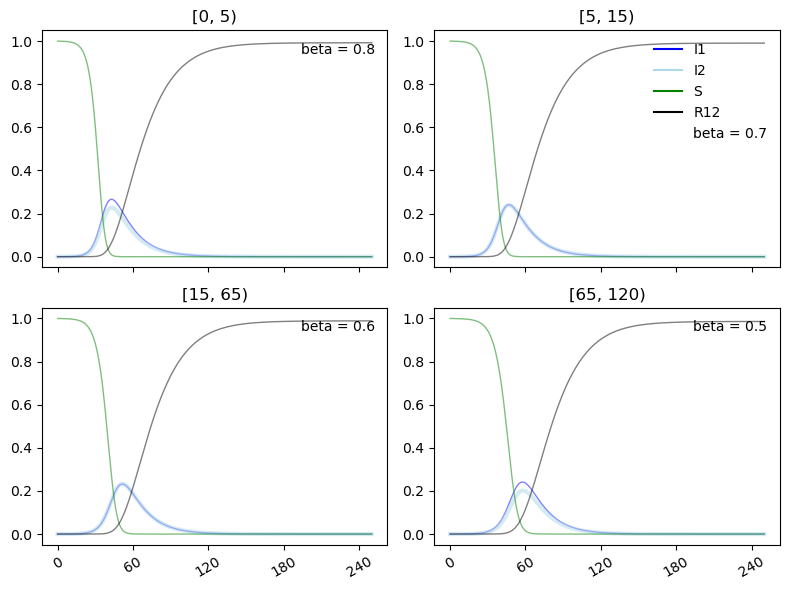

In [11]:
###########################
# Visualizing the results #
###########################
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(8,6)) # we'll make one plot per age-group
axs = axs.reshape(-1) #reshapes the array axs into a one-dimensional array.

unique_age_groups = out2.indexes['age_group'].unique()

from matplotlib.lines import Line2D
legend_handles2 = [
    Line2D([0], [0], color='blue', label='I1'),
    Line2D([0], [0], color='lightblue', label='I2'),
    Line2D([0], [0], color='green', label='S'),
    Line2D([0], [0], color='black', label='R12'), 
    # Custom legend handle without line
    Line2D([], [], color='none', label='beta = 0.7'),
]

legend_handlesOther = [
    Line2D([], [], color='none', label='beta = 0.8'),
    Line2D([], [], color='none', label='beta = 0.6'),
    Line2D([], [], color='none', label='beta = 0.5'),
    ]

for id, age_class in enumerate(unique_age_groups):
        # Data
        # empty because I have no data ...
        # Model trajectories
        for i in range(n):
            axs[id].plot(out2['time'],out2['I1'].sel(age_group=age_class)/initN.loc[age_class], color='blue', alpha=0.5, linewidth=1)
            axs[id].plot(out2['time'],out2['I2'].sel(age_group=age_class)/initN.loc[age_class], color='lightblue', alpha=0.5, linewidth=3)
            axs[id].plot(out2['time'],out2['S'].sel(age_group=age_class)/initN.loc[age_class], color='green', alpha=0.5, linewidth=1)
            axs[id].plot(out2['time'],out2['R12'].sel(age_group=age_class)/initN.loc[age_class], color='black', alpha=0.5, linewidth=1)
        # Format
        axs[id].set_title(age_class)
        axs[id].legend()
        axs[id].xaxis.set_major_locator(plt.MaxNLocator(5))
        for tick in axs[id].get_xticklabels():
            tick.set_rotation(30)
        axs[id].grid(False)
        if id==1:
            axs[id].legend(handles=legend_handles2, loc = 'upper right', frameon=False)
        elif id == 0:
             axs[id].legend(handles = [legend_handlesOther[0]], loc="upper right", frameon=False)
        elif id == 2:
             axs[id].legend(handles = [legend_handlesOther[1]], loc="upper right", frameon=False)
        elif id == 3:
             axs[id].legend(handles = [legend_handlesOther[2]], loc="upper right", frameon=False)
        # axs[id].set_ylim(0, 8e6) #- I wanted to set a fixed yaxis range, but then the epidemic in adults is barely visible

plt.tight_layout()
plt.savefig("/home/rita/PyProjects/Practice/pySODM/DENV_SEIRH_AgeGroups_DifBeta.pdf")

plt.show()
plt.close(fig)

In [12]:
##########################
# simulate the new model # with 50 repeated simulations instead of 1 (N = 50)
##########################
tau = 0.5
n = 50   # Repeated simulations used in visualisations - not used at the moment = 1
out3 = model2.sim(time=250, samples={}, N =n ,tau=tau, output_timestep=1)
#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out3)
# print(out.indexes['age_group'].unique())

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 251, age_group: 4, draws: 50)
Coordinates:
  * time       (time) int64 2kB 0 1 2 3 4 5 6 7 ... 244 245 246 247 248 249 250
  * age_group  (age_group) object 32B [0, 5) [5, 15) [15, 65) [65, 120)
Dimensions without coordinates: draws
Data variables:
    S          (draws, time, age_group) float64 402kB 6.068e+05 ... 0.0
    E1         (draws, time, age_group) float64 402kB 0.0 0.0 0.0 ... 0.0 0.0
    E2         (draws, time, age_group) float64 402kB 0.0 0.0 0.0 ... 0.0 0.0
    I1         (draws, time, age_group) float64 402kB 60.0 132.0 ... 7.0 4.0
    I2         (draws, time, age_group) float64 402kB 60.0 132.0 ... 4.0 3.0
    R1         (draws, time, age_group) float64 402kB 0.0 0.0 ... 1.582e+04
    R2         (draws, time, age_group) float64 402kB 0.0 0.0 ... 1.553e+04
    H1         (draws, time, age_group) float64 402kB 0.0 0.0 0.0 ... 186.0 86.0
    H2         (draws, time, age_group) float64 402kB 0.0 0.0 0.0 ... 185.0 87.0
    R1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


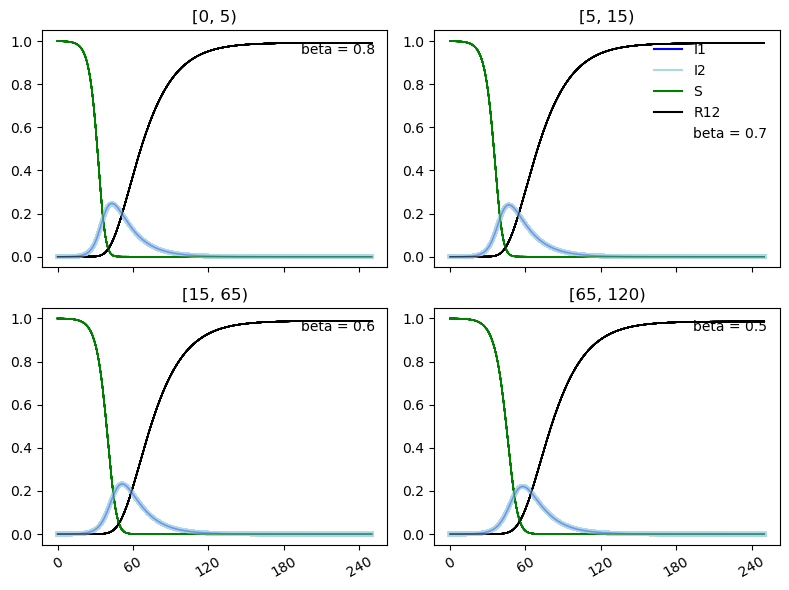

In [13]:
###########################
# Visualizing the results #
###########################
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(8,6)) # we'll make one plot per age-group
axs = axs.reshape(-1) #reshapes the array axs into a one-dimensional array.

unique_age_groups = out3.indexes['age_group'].unique()

from matplotlib.lines import Line2D
legend_handles2 = [
    Line2D([0], [0], color='blue', label='I1'),
    Line2D([0], [0], color='lightblue', label='I2'),
    Line2D([0], [0], color='green', label='S'),
    Line2D([0], [0], color='black', label='R12'), 
    # Custom legend handle without line
    Line2D([], [], color='none', label='beta = 0.7'),
]

legend_handlesOther = [
    Line2D([], [], color='none', label='beta = 0.8'),
    Line2D([], [], color='none', label='beta = 0.6'),
    Line2D([], [], color='none', label='beta = 0.5'),
    ]

for id, age_class in enumerate(unique_age_groups):
        # Data
        # empty because I have no data ...
        # Model trajectories
        for i in range(n):
            axs[id].plot(out3['time'],out3['I1'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='blue', alpha=0.5, linewidth=1)
            axs[id].plot(out3['time'],out3['I2'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='lightblue', alpha=0.5, linewidth=3)
            axs[id].plot(out3['time'],out3['S'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='green', alpha=0.5, linewidth=1)
            axs[id].plot(out3['time'],out3['R12'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='black', alpha=0.5, linewidth=1)
        # Format
        axs[id].set_title(age_class)
        axs[id].legend()
        axs[id].xaxis.set_major_locator(plt.MaxNLocator(5))
        for tick in axs[id].get_xticklabels():
            tick.set_rotation(30)
        axs[id].grid(False)
        if id==1:
            axs[id].legend(handles=legend_handles2, loc = 'upper right', frameon=False)
        elif id == 0:
             axs[id].legend(handles = [legend_handlesOther[0]], loc="upper right", frameon=False)
        elif id == 2:
             axs[id].legend(handles = [legend_handlesOther[1]], loc="upper right", frameon=False)
        elif id == 3:
             axs[id].legend(handles = [legend_handlesOther[2]], loc="upper right", frameon=False)
        #axs[id].set_ylim(0, 10e6) #- I wanted to set a fixed yaxis range, but then the epidemic in adults is barely visible

plt.tight_layout()
plt.savefig("/home/rita/PyProjects/Practice/pySODM/DENV_SEIRH_AgeGroups_DifBeta_repSim50.pdf")

plt.show()
plt.close(fig)

## SEIRH model with seasonal forcing and altering baseline beta parameters per age-group

The seasonal aspect assumes 1 major peak per year around the period of september. 
Beta(t)  = Beta_0 * (1 - Beta_1 * cos(2*pi*t/365 + phase))
The phase is set equal to 273 (first of september) - 181 (first of June) / 365

In [14]:
################
## Load model ##
################

from DENV_models_pySODM import JumpProcess_SEIRH_BetaPerAge_SeasonalForcing as DENV_model_SF

In [15]:
#################
## Setup model ##
#################
# p = (273-181)/365
p = 0
# Define model parameters
params = {'sigma':5, 'gamma': 15, 'psi': 0.3, 'beta_0' : np.array([0.7, 0.5, 0.25, 0.10]), 'beta_1' : 0.5, 'ph':p} 
# Define initial condition
age_groups = pd.IntervalIndex.from_tuples([(0,5),(5,15),(15,65),(65,120)], closed='left')
initN = pd.Series(index=age_groups, data=np.array([606938, 1328733, 7352492, 2204478]))  
initI = (initN * 1e-4).astype('int64')
initS = initN - initI

init_states = {'S': list(initS.values),
               'I1': list(initI.values),
               'I2': list(initI.values)}

# Define model coordinates
coordinates={'age_group': age_groups}

In [16]:
####################
# Initialize model #
####################

modelSF = DENV_model_SF(states=init_states, parameters=params, coordinates=coordinates) # no time_dependent_parameters

In [19]:
##########################
# simulate the new model # with seasonal forcing
##########################
tau = 0.5
n = 1   # Repeated simulations used in visualisations - not used at the moment = 1
out4 = modelSF.sim(time=365, samples={}, N =n ,tau=tau, output_timestep=7)
#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out4)
# print(out.indexes['age_group'].unique())

<xarray.Dataset> Size: 17kB
Dimensions:    (time: 53, age_group: 4)
Coordinates:
  * time       (time) int64 424B 0 7 14 21 28 35 42 ... 329 336 343 350 357 364
  * age_group  (age_group) object 32B [0, 5) [5, 15) [15, 65) [65, 120)
Data variables:
    S          (time, age_group) float64 2kB 6.069e+05 1.329e+06 ... 9.913e+05
    E1         (time, age_group) float64 2kB 0.0 0.0 0.0 ... 4.0 44.0 4.232e+04
    E2         (time, age_group) float64 2kB 0.0 0.0 0.0 ... 10.0 54.0 3.888e+04
    I1         (time, age_group) float64 2kB 60.0 132.0 ... 398.0 1.338e+05
    I2         (time, age_group) float64 2kB 60.0 132.0 ... 402.0 1.214e+05
    R1         (time, age_group) float64 2kB 0.0 0.0 0.0 ... 2.137e+06 4.347e+05
    R2         (time, age_group) float64 2kB 0.0 0.0 0.0 ... 2.14e+06 3.944e+05
    H1         (time, age_group) float64 2kB 0.0 0.0 0.0 ... 5.009e+03 9.498e+03
    H2         (time, age_group) float64 2kB 0.0 0.0 0.0 ... 5.141e+03 9.545e+03
    R12        (time, age_group) flo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


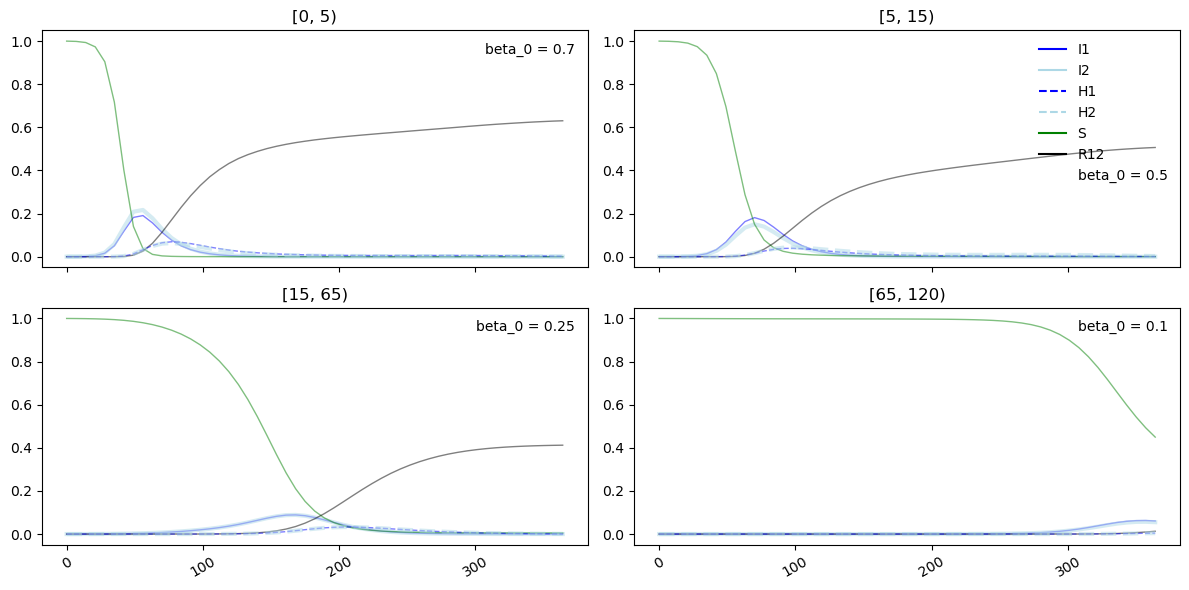

In [22]:
###########################
# Visualizing the results # FOR THE SEASONAL FORCING MODEL
###########################
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(12,6)) # we'll make one plot per age-group
axs = axs.reshape(-1) #reshapes the array axs into a one-dimensional array.

unique_age_groups = out4.indexes['age_group'].unique()

from matplotlib.lines import Line2D
legend_handles2 = [
    Line2D([0], [0], color='blue', label='I1'),
    Line2D([0], [0], color='lightblue', label='I2'),
    Line2D([0], [0], color='blue', label='H1', linestyle='--'),
    Line2D([0], [0], color='lightblue', label='H2',linestyle='--'),
    Line2D([0], [0], color='green', label='S'),
    Line2D([0], [0], color='black', label='R12'), 
    # Custom legend handle without line
    Line2D([], [], color='none', label=f"beta_0 = {params['beta_0'][1]}"),
]

legend_handlesOther = [
    Line2D([], [], color='none', label=f"beta_0 = {params['beta_0'][0]}"),
    Line2D([], [], color='none', label=f"beta_0 = {params['beta_0'][2]}"),
    Line2D([], [], color='none', label=f"beta_0 = {params['beta_0'][3]}"),
    ]

for id, age_class in enumerate(unique_age_groups):
        # Data
        # empty because I have no data ...
        # Model trajectories
        for i in range(n):
            axs[id].plot(out4['time'],out4['I1'].sel(age_group=age_class)/initN.loc[age_class], color='blue', alpha=0.5, linewidth=1)
            axs[id].plot(out4['time'],out4['I2'].sel(age_group=age_class)/initN.loc[age_class], color='lightblue', alpha=0.5, linewidth=3)
            axs[id].plot(out4['time'],out4['S'].sel(age_group=age_class)/initN.loc[age_class], color='green', alpha=0.5, linewidth=1)
            axs[id].plot(out4['time'],out4['R12'].sel(age_group=age_class)/initN.loc[age_class], color='black', alpha=0.5, linewidth=1)
            axs[id].plot(out4['time'],out4['H1'].sel(age_group=age_class)/initN.loc[age_class], color='blue', alpha=0.5, linewidth=1, linestyle = '--')
            axs[id].plot(out4['time'],out4['H2'].sel(age_group=age_class)/initN.loc[age_class], color='lightblue', alpha=0.5, linewidth=3, linestyle = '--')
        # Format
        axs[id].set_title(age_class)
        # axs[id].set_yscale('log')
        axs[id].legend()
        axs[id].xaxis.set_major_locator(plt.MaxNLocator(5))
        for tick in axs[id].get_xticklabels():
            tick.set_rotation(30)
        axs[id].grid(False)
        if id==1:
            axs[id].legend(handles=legend_handles2, loc = 'upper right', frameon=False)
        elif id == 0:
             axs[id].legend(handles = [legend_handlesOther[0]], loc="upper right", frameon=False)
        elif id == 2:
             axs[id].legend(handles = [legend_handlesOther[1]], loc="upper right", frameon=False)
        elif id == 3:
             axs[id].legend(handles = [legend_handlesOther[2]], loc="upper right", frameon=False)
        #axs[id].set_ylim(0, 10e6) #- I wanted to set a fixed yaxis range, but then the epidemic in adults is barely visible

plt.tight_layout()
# plt.savefig("/home/rita/PyProjects/Practice/pySODM/DENV_SEIR2_AgeGroups_DifBeta.pdf")

plt.show()
plt.close(fig)

## The real SEIR2 stochastic model with 2 subsequent infections in compartments
Model is called: JumpProcess_rSEIR2_BetaPerAge_SeasonalForcing in DENV_models_pySODM.py  
In this model, we have for each serotype: S -> E1 -> I1 -> R1 -> S1 -----> E12 -> I12 -> R  
In this model the psi actually represents the increased infectiousness of a secondarily infected individual (I12 or I21).  
Alpha is the TCI period (time someone is immune to any other serotype after recovery from initial infection). 

In [2]:
################
## Load model ##
################

from DENV_models_pySODM import JumpProcess_SEIR2_BetaPerAge_SeasonalForcing as DENV_model_SF_SEIR2

In [20]:
#################
## Setup model ##
#################
# p = (273-181)/365
p = 0
# Define model parameters
params = {'alpha': 45 ,'sigma':5, 'gamma': 15, 'psi': 1.5, 'beta_0' : np.array([0.2, 0.15, 0.10, 0.05]), 'beta_1' : 0.5, 'ph':p} # I made younger groups more infectious than older, beta_1 is the same for all age groups

# Define initial condition
age_groups = pd.IntervalIndex.from_tuples([(0,5),(5,15),(15,65),(65,120)], closed='left')
# Using the hardcode Belgian demographics from the influenza case study
initN = pd.Series(index=age_groups, data=np.array([606938, 1328733, 7352492, 2204478]))  
initI = (initN * 1e-4).astype('int64')
initS = initN - initI

init_states = {'S': list(initS.values),
               'I1': list(initI.values),
               'I2': list(initI.values)}

# Define model coordinates
coordinates={'age_group': age_groups}

In [21]:
####################
# Initialize model #
####################

model_SEIR2_SF = DENV_model_SF_SEIR2(states=init_states, parameters=params, coordinates=coordinates) # no time_dependent_parameters

In [24]:
##########################
# simulate the new model # with seasonal forcing and subsequent infections 
##########################
tau = 1
n = 50   # Repeated simulations used in visualisations - not used at the moment = 1
out5 = model_SEIR2_SF.sim(time=5*365, samples={}, N =n ,tau=tau, output_timestep=7)
#  Can change the values of model parameters at every repeated simulation by drawing samples from a dictionary `samples` using a function `draw_function`
print(out5)
# print(out.indexes['age_group'].unique())

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 261, age_group: 4, draws: 50)
Coordinates:
  * time       (time) int64 2kB 0 7 14 21 28 35 ... 1792 1799 1806 1813 1820
  * age_group  (age_group) object 32B [0, 5) [5, 15) [15, 65) [65, 120)
Dimensions without coordinates: draws
Data variables: (12/14)
    S          (draws, time, age_group) float64 418kB 6.069e+05 ... 2.203e+06
    S1         (draws, time, age_group) float64 418kB 0.0 0.0 ... 847.0
    S2         (draws, time, age_group) float64 418kB 0.0 0.0 ... 1.94e+06 632.0
    E1         (draws, time, age_group) float64 418kB 0.0 0.0 0.0 ... 0.0 0.0
    E2         (draws, time, age_group) float64 418kB 0.0 0.0 0.0 ... 0.0 0.0
    E12        (draws, time, age_group) float64 418kB 0.0 0.0 0.0 ... 0.0 0.0
    ...         ...
    I2         (draws, time, age_group) float64 418kB 60.0 132.0 ... 0.0 0.0
    I12        (draws, time, age_group) float64 418kB 0.0 0.0 0.0 ... 0.0 0.0
    I21        (draws, time, age_group) float64 418kB 0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


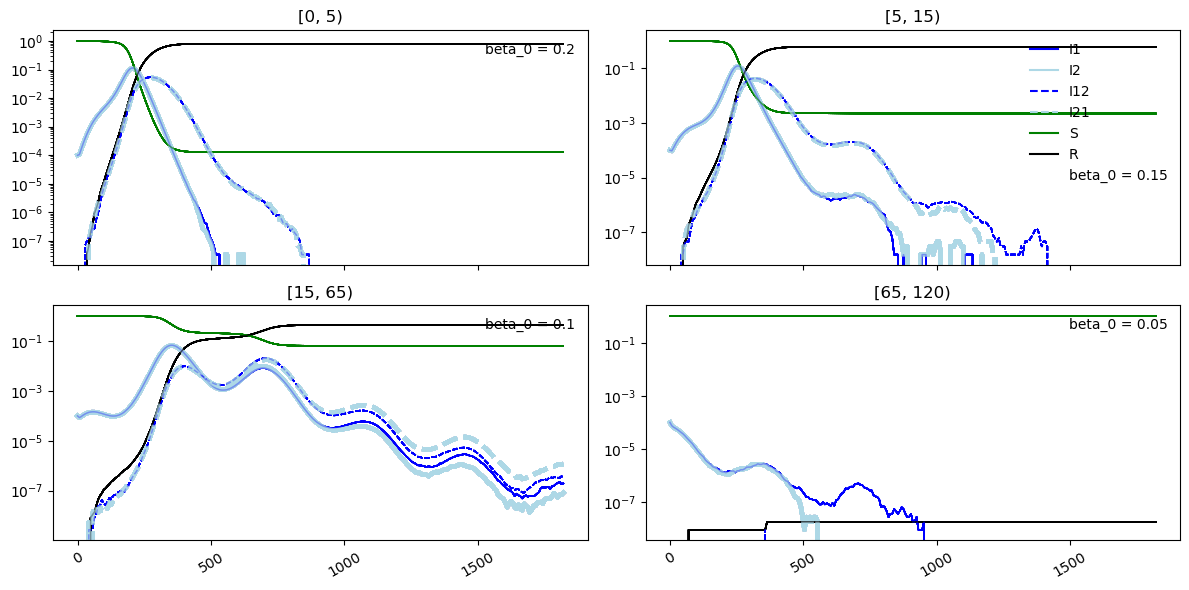

In [25]:
###########################
# Visualizing the results # FOR THE SEASONAL FORCING MODEL with "real" SEIR2 compartments
###########################
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(12,6)) # we'll make one plot per age-group
axs = axs.reshape(-1) #reshapes the array axs into a one-dimensional array.

unique_age_groups = out5.indexes['age_group'].unique()

from matplotlib.lines import Line2D
legend_handles2 = [
    Line2D([0], [0], color='blue', label='I1'),
    Line2D([0], [0], color='lightblue', label='I2'),
    Line2D([0], [0], color='blue', label='I12', linestyle='--'),
    Line2D([0], [0], color='lightblue', label='I21',linestyle='--'),
    Line2D([0], [0], color='green', label='S'),
    Line2D([0], [0], color='black', label='R'), 
    # Custom legend handle without line
    Line2D([], [], color='none', label=f"beta_0 = {params['beta_0'][1]}"),
]

legend_handlesOther = [
    Line2D([], [], color='none', label=f"beta_0 = {params['beta_0'][0]}"),
    Line2D([], [], color='none', label=f"beta_0 = {params['beta_0'][2]}"),
    Line2D([], [], color='none', label=f"beta_0 = {params['beta_0'][3]}"),
    ]

for id, age_class in enumerate(unique_age_groups):
        # Data
        # empty because I have no data ...
        # Model trajectories
        for i in range(n):
            axs[id].plot(out5['time'],out5['I1'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='blue', alpha=0.5, linewidth=1)
            axs[id].plot(out5['time'],out5['I2'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='lightblue', alpha=0.5, linewidth=3)
            axs[id].plot(out5['time'],out5['S'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='green', alpha=0.5, linewidth=1)
            axs[id].plot(out5['time'],out5['R'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='black', alpha=0.5, linewidth=1)
            axs[id].plot(out5['time'],out5['I12'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='blue', alpha=0.5, linewidth=1, linestyle = '--')
            axs[id].plot(out5['time'],out5['I21'].sel(age_group=age_class).mean(dim='draws')/initN.loc[age_class], color='lightblue', alpha=0.5, linewidth=3, linestyle = '--')
        # Format
        axs[id].set_title(age_class)
        axs[id].set_yscale('log')
        axs[id].legend()
        axs[id].xaxis.set_major_locator(plt.MaxNLocator(5))
        for tick in axs[id].get_xticklabels():
            tick.set_rotation(30)
        axs[id].grid(False)
        if id==1:
            axs[id].legend(handles=legend_handles2, loc = 'upper right', frameon=False)
        elif id == 0:
             axs[id].legend(handles = [legend_handlesOther[0]], loc="upper right", frameon=False)
        elif id == 2:
             axs[id].legend(handles = [legend_handlesOther[1]], loc="upper right", frameon=False)
        elif id == 3:
             axs[id].legend(handles = [legend_handlesOther[2]], loc="upper right", frameon=False)
        #axs[id].set_ylim(0, 10e6) #- I wanted to set a fixed yaxis range, but then the epidemic in adults is barely visible

plt.tight_layout()
# plt.savefig("/home/rita/PyProjects/Practice/pySODM/DENV_SEIR2_AgeGroups_DifBeta.pdf")

plt.show()
plt.close(fig)

In the following I want to check whether the dimensions of my output are in fact what I expect them to be:  
I have 3 dimensions in my output: time, age_group and draws  
 - time is 261 long because I made a time vector of 5*365, where I requested the output to by in steps of 7 (5*365/7) = 261  
 - age_group is size 4, we have 4 groups  

The time and age_group dimensions also have coordinates, draws doesn't  
Finally, I have 14 data variables which represent my 14 states: S,S1, S2, E1, E2, E12, E21, I1, I2, I12, I21, R1, R2, R  

In [30]:
print(type(out5)) #class 'xarray.core.dataset.Dataset'
print(str(out5))

# check what each dimension is and what size it contains
for dim in out5.dims:
    print(f"Dimension '{dim}': Size {out5[dim].size}")

# print out a slice of the data according to each dimension
for dim in out5.dims:
    print(f"Dimension '{dim}':")
    print(out5[dim][:3])  # Print the first three elements along the current dimension
    print()  # Add an empty line for separation


<class 'xarray.core.dataset.Dataset'>
<xarray.Dataset> Size: 6MB
Dimensions:    (time: 261, age_group: 4, draws: 50)
Coordinates:
  * time       (time) int64 2kB 0 7 14 21 28 35 ... 1792 1799 1806 1813 1820
  * age_group  (age_group) object 32B [0, 5) [5, 15) [15, 65) [65, 120)
Dimensions without coordinates: draws
Data variables: (12/14)
    S          (draws, time, age_group) float64 418kB 6.069e+05 ... 2.203e+06
    S1         (draws, time, age_group) float64 418kB 0.0 0.0 ... 847.0
    S2         (draws, time, age_group) float64 418kB 0.0 0.0 ... 1.94e+06 632.0
    E1         (draws, time, age_group) float64 418kB 0.0 0.0 0.0 ... 0.0 0.0
    E2         (draws, time, age_group) float64 418kB 0.0 0.0 0.0 ... 0.0 0.0
    E12        (draws, time, age_group) float64 418kB 0.0 0.0 0.0 ... 0.0 0.0
    ...         ...
    I2         (draws, time, age_group) float64 418kB 60.0 132.0 ... 0.0 0.0
    I12        (draws, time, age_group) float64 418kB 0.0 0.0 0.0 ... 0.0 0.0
    I21        (dra